In [1]:
import pandas as pd


# Read trips and resample to a weekly count

In [2]:
timeseries = pd.read_parquet("../data/interim/comb_trips.gzip").set_index("started_at")

timeseries.index.name = "date"
# ended at was randomly selected of the columns, could be any of them
weekly = timeseries.resample("1W").count().ended_at


# checking the toal number of trips by category

In [3]:
timeseries.groupby("member_casual").count()


,ended_at,start_station_id,end_station_id
member_casual,,,
casual,7390529,7238049,7207143
member,23898886,23757723,23750800
unknown,58,58,58


## Splitting between member trips and casual (i.e. non-member)

In [4]:
membertrips_week = (
    timeseries[timeseries.member_casual == "member"].resample("1W").count().ended_at
)
casualtrips_week = (
    timeseries[timeseries.member_casual == "casual"].resample("1W").count().ended_at
)
# give them a name for the legened in the plot
membertrips_week.name = "member trips"
casualtrips_week.name = "non-member trips"

## Plotting the member and non-member trips

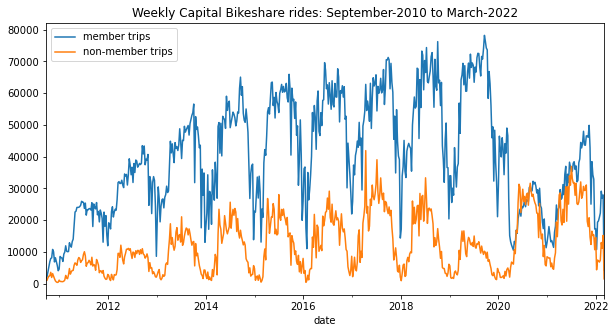

In [5]:
# finding the range of dates being mapped
start = weekly.index.min()
end = weekly.index.max()

ax = combined_timseries = pd.merge_asof(
    membertrips_week, casualtrips_week, left_index=True, right_index=True
).plot(
    figsize=(10, 5),
    title=f"Weekly Capital Bikeshare rides: {start.month_name()}-{start.year} to {end.month_name()}-{end.year}",
)
fig = ax.get_figure()
fig.savefig(
    "../reports/figures/weekly_trips.png", bbox_inches="tight", facecolor="w", dpi=200
)


<AxesSubplot:xlabel='date'>

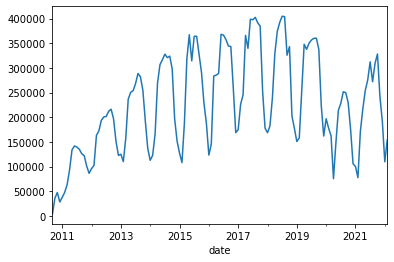

In [6]:
timeseries.resample("1M").count().ended_at.plot()
